# Visualising the SVM Update

This is a small notebook to help me visualise the update step a Support Vector Machine (SVM) using Stochastic Gradient Descent (SGD). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
def get_line_slope_from_vector(v):
    """Returns the slope of the straight line defined by the input vector."""
    w = np.array([v[1], -v[0]])
    return w[1] / w[0]


def plot_svm(theta):
    """Plots the support vector machine defined by theta."""
    plt.axis([-2, 2, -2, 2])
    plt.axhline(0, color="lightgrey")
    plt.axvline(0, color="lightgrey")
    plt.gca().set_aspect("equal")
    # plot theta vector
    plt.quiver(0, 0, theta[0], theta[1], units="xy", scale=1)
    # plot decision boundary
    slope = get_line_slope_from_vector(theta)
    plt.axline((0, 0), slope=slope, color="black", linestyle="solid")
    # plot margins
    d = 1 / np.linalg.norm(theta)
    plt.axline((d, 0), slope=slope, color="black", linestyle="dotted")
    plt.axline((-d, 0), slope=slope, color="black", linestyle="dotted")


def plot_point(x):
    """Plot point defined by vector x."""
    plt.plot(x[0], x[1], marker="+")

<IPython.core.display.Javascript object>

We'll initialise `theta` and check what the SVM looks like:

In [3]:
theta = np.array([1, 1])

<IPython.core.display.Javascript object>

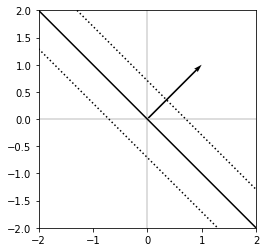

<IPython.core.display.Javascript object>

In [4]:
plot_svm(theta)

In [5]:
def hinge_loss_gradient(theta, x, y):
    """Returns value of hinge loss derivative w.r.t. theta."""
    z = y * np.dot(theta, x)
    if z < 1:
        return -y * x
    return np.zeros(x.shape[0])


def regularization_gradient(theta, lambda_):
    """Returns value of derivative w.r.t. theta of the regularization term."""
    return lambda_ * theta


def sgd_update(theta, x, y, lambda_=0.6, learning_rate=0.8):
    """Perfoms a single step of SVM update using SGD."""
    print("Hinge Loss gradient:", hinge_loss_gradient(theta, x, y))
    print("Regularization gradient:", regularization_gradient(theta, lambda_))
    return theta - learning_rate * (
        hinge_loss_gradient(theta, x, y) + regularization_gradient(theta, lambda_)
    )

<IPython.core.display.Javascript object>

## Updating with Small Learning Rate

We'll start with a small learning rate.

### Outside Margin

The point `x_1` is accurately classified and just outside the decision boundary margins:

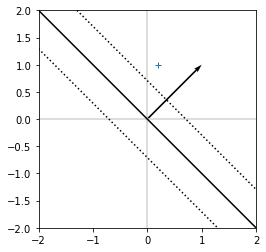

<IPython.core.display.Javascript object>

In [6]:
x_1 = np.array([0.2, 1])
y_1 = 1
plot_svm(theta)
plot_point(x_1)

Theta before update: [1 1]
Hinge Loss gradient: [0. 0.]
Regularization gradient: [0.6 0.6]
Theta after update: [0.88 0.88]


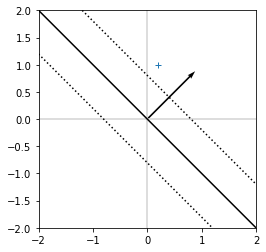

<IPython.core.display.Javascript object>

In [7]:
print("Theta before update:", theta)
theta_1 = sgd_update(theta, x_1, y_1, learning_rate=0.2)
print("Theta after update:", theta_1)
plot_svm(theta_1)
plot_point(x_1)

We note that the hinge loss gradient is [0, 0] as the point is correctly classified. As such the direction of `theta` is not going to change. The norm is going to shrink because of the regularization gradient, and since the norm is inversely correlated with the margins, the margins will grow (although hardly visible above).

### Inside Margin



This time the point we're using to update sits within the margins (but still on the right side of the decision boundary).

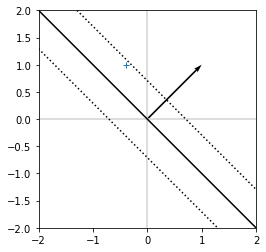

<IPython.core.display.Javascript object>

In [8]:
x_2 = np.array([-0.4, 1])
y_2 = 1
plot_svm(theta)
plot_point(x_2)

Theta before update: [1 1]
Hinge Loss gradient: [ 0.4 -1. ]
Regularization gradient: [0.6 0.6]
Theta after update: [0.8  1.08]


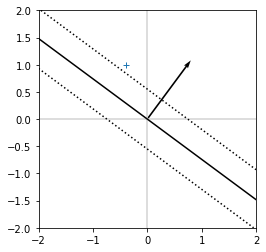

<IPython.core.display.Javascript object>

In [9]:
print("Theta before update:", theta)
theta_2 = sgd_update(theta, x_2, y_2, learning_rate=0.2)
print("Theta after update:", theta_2)
plot_svm(theta_2)
plot_point(x_2)

Note that the hinge loss is not null, so both the direction and the norm of `theta` have been updated.

## Large Learning Rate

We'll run the SGD update on two points, one just outside the margin and one inside the margin.

### Outside Margin

The point `x_1` is accurately classified and just outside the decision boundary margins:

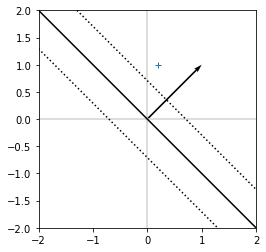

<IPython.core.display.Javascript object>

In [10]:
x_1 = np.array([0.2, 1])
y_1 = 1
plot_svm(theta)
plot_point(x_1)

We'll update the SVM with SGD:

Theta before update: [1 1]
Hinge Loss gradient: [0. 0.]
Regularization gradient: [0.6 0.6]
Theta after update: [0.52 0.52]


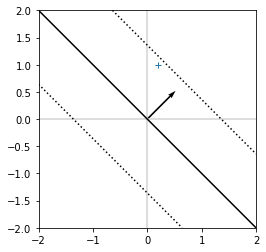

<IPython.core.display.Javascript object>

In [11]:
print("Theta before update:", theta)
theta_1 = sgd_update(theta, x_1, y_1, learning_rate=0.8)
print("Theta after update:", theta_1)
plot_svm(theta_1)
plot_point(x_1)

We notice the decision boundary has not changed, however the margins are now larger.

### Inside Margin

This time the point we're using to update sits within the margins (but still on the right side of the decision boundary).

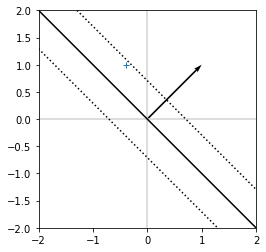

<IPython.core.display.Javascript object>

In [12]:
x_2 = np.array([-0.4, 1])
y_2 = 1
plot_svm(theta)
plot_point(x_2)

Theta before update: [1 1]
Hinge Loss gradient: [ 0.4 -1. ]
Regularization gradient: [0.6 0.6]
Theta after update: [0.2  1.32]


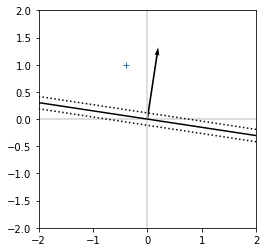

<IPython.core.display.Javascript object>

In [13]:
print("Theta before update:", theta)
theta_2 = sgd_update(theta, x_2, y_2, learning_rate=0.8)
print("Theta after update:", theta_2)
plot_svm(theta_2)
plot_point(x_2)